# Getting started with MaterialsCoord

This notebook will introduce the basic functionality of MaterialsCoord and demonstrate how to benchmark different coordination algorithms implemented in pymatgen.

*Written using:*
- MaterialsCoord==0.1.0

*Authors: Alex Ganose (10/14/19)*

---

## The benchmark class

The primary object in MaterialsCoord is the `Benchmark` class. This contains all the functionality needed for loading structures, running near neighbor algorithms on the structures and calculating the benchmark score. `Benchmark` can be loaded using:

In [1]:
from materialscoord.core import Benchmark

The benchmark object can be initialized from a set of structures with the correct coordination provided as a site attribute. More information on preparing your own structures for benchmarking is given in the [benchmarking-custom-structures notebook](benchmarking-custom-structures.ipynb).

To make benchmarking easy, we have provided a set of default structures that can be used to assess the performance of coordination algorithms. These structures have been split into several *structure groups*, including:

- `"elemental"`: Simple elemental materials, including diamond, graphite, Ga,
  and α-As.
- `"common_binaries"`: Simple and more complex binary structures, including
  rocksalt NaCl, rutile TiO<sub>2</sub>, and γ-brass.
- `"ABX3"`: ABX<sub>3</sub> structured ternary materials, including perovskite
  SrTiO<sub>3</sub> and argonite CaCO<sub>3</sub>.
- `"ABX4"`: ABX<sub>4</sub> structured ternary materials, including zircon,
  (ZrSiO<sub>4</sub>) and wolframite (FeWO<sub>4</sub>).
- `"A2BX4"`: A<sub>2</sub>BX<sub>4</sub> structured ternary materials, including
  olivine Fe<sub>2</sub>SiO<sub>4</sub>.
  
The full list of available structure groups can be seen by inspecting the `Benchmark.all_structure_groups` variable.

In [2]:
Benchmark.all_structure_groups

['misc',
 'A2BX4',
 'mixed',
 'clusters',
 'laves',
 'zeolites',
 'elemental',
 'ABX3',
 'ABX4',
 'common_binaries']

We can load structure groups into the benchmark using the `from_structure_group` function. This function can accept one or more structure groups. For example:

In [3]:
# load the elemental structure group into the benchmark
bm = Benchmark.from_structure_group("elemental")

# alternatively, load multiple structure groups
bm = Benchmark.from_structure_group(["elemental", "common_binaries"])

We can see which structures were included in the benchmark by inspecting the `structures` attribute.

In [4]:
bm.structures

{'P_black_23836': Structure Summary
 Lattice
     abc : 3.3136 10.478 4.3763
  angles : 90.0 90.0 90.0
  volume : 151.94470187103997
       A : 3.3136 0.0 2.028994816827335e-16
       B : -6.415924580732983e-16 10.478 6.415924580732983e-16
       C : 0.0 0.0 4.3763
 PeriodicSite: P (-0.0000, 4.1736, 2.5407) [0.0000, 0.3983, 0.5806]
 PeriodicSite: P (-0.0000, 6.3044, 1.8356) [0.0000, 0.6017, 0.4194]
 PeriodicSite: P (-0.0000, 1.0654, 0.3526) [0.0000, 0.1017, 0.0806]
 PeriodicSite: P (-0.0000, 9.4126, 4.0237) [0.0000, 0.8983, 0.9194]
 PeriodicSite: P (1.6568, 9.4126, 2.5407) [0.5000, 0.8983, 0.5806]
 PeriodicSite: P (1.6568, 1.0654, 1.8356) [0.5000, 0.1017, 0.4194]
 PeriodicSite: P (1.6568, 6.3044, 0.3526) [0.5000, 0.6017, 0.0806]
 PeriodicSite: P (1.6568, 4.1736, 4.0237) [0.5000, 0.3983, 0.9194],
 'U_alpha_16056': Structure Summary
 Lattice
     abc : 2.854 5.87 4.955
  angles : 90.0 90.0 90.0
  volume : 83.0110159
       A : 2.854 0.0 1.747570982383273e-16
       B : -3.594338355497482

The human interpreted coordination number is stored in the `"coordination"` site property for each structure. For example, the human interpreted coordination of the `P_black_23836` structure can accessed using:

In [5]:
bm.structures["P_black_23836"].site_properties["coordination"]

[{'P': 3.0},
 {'P': 3.0},
 {'P': 3.0},
 {'P': 3.0},
 {'P': 3.0},
 {'P': 3.0},
 {'P': 3.0},
 {'P': 3.0}]

## Near neighbor algorithms

The `pymatgen.analysis.local_env` module contains implementations of many near neighbor classes used to calculate bonding and coordination numbers. The full information on each of these classes is given in the MaterialsCoord paper and in the pymatgen documentation. We can load the near neighbor classes using:

In [6]:
from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, CrystalNN

MaterialsCoord requires initialized versions of each of the classes. We therefore prepare the classes for benchmarking as follows:

In [7]:
nn_methods = [
    MinimumDistanceNN(),  MinimumOKeeffeNN(), MinimumVIRENN(), JmolNN(), 
    EconNN(), BrunnerNN_reciprocal(), VoronoiNN(tol=0.5), CrystalNN()
]

## Running the benchmark

The benchmark class provides two primary functions:
    
- `benchmark()`: Run the near neighbor methods on each of the structures to obtain the coordination numbers for each symmetry inequivalent site.
- `score()`: Compare the results of the near neighbor algorithms to the human determined coordination numbers and calculate the benchmark score.

Both functions require a list of near neighbor methods as input. We can see the output for the `benchmark()` method using:

In [8]:
bm.benchmark(nn_methods)

/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3565: UserWarning: CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  warnings.warn("CrystalNN: distance cutoffs set but no oxidation "
/Users/alexganose/dev/src/pymatgen/pymatgen/analysis/local_env.py:3380: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "


,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumVIRENN0,MinimumVIRENN1,...,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3
Al2O3_corundum_9770,{'O': 6},{'Al': 4},None,None,"{'Al': 1, 'O': 6}",{'Al': 4},None,None,{'O': 6},"{'Al': 4, 'O': 4}",...,None,None,{'O': 6},{'Al': 4},None,None,{'O': 6},{'Al': 4},None,None
As_alpha_16518,{'As': 3},None,None,None,{'As': 3},None,None,None,{'As': 3},None,...,None,None,{'As': 6},None,None,None,{'As': 3},None,None,None
C_diamond_52054,{'C': 4},None,None,None,{'C': 4},None,None,None,{'C': 4},None,...,None,None,{'C': 4},None,None,None,{'C': 4},None,None,None
C_graphite_76767,{'C': 3},{'C': 3},None,None,{'C': 3},{'C': 3},None,None,{'C': 3},{'C': 3},...,None,None,{'C': 3},{'C': 3},None,None,{'C': 3},{'C': 3},None,None
CsCl_53847,{'Cl': 8},{'Cs': 8},None,None,{'Cs': 6},{'Cs': 8},None,None,"{'Cl': 8, 'Cs': 6}",{'Cs': 8},...,None,None,{'Cl': 8},{'Cs': 8},None,None,{'Cl': 8},{'Cs': 8},None,None
Cu5Zn8_gamma_brass_2092,"{'Zn': 6, 'Cu': 6}","{'Zn': 5, 'Cu': 3}","{'Zn': 9, 'Cu': 3}","{'Cu': 3, 'Zn': 4}","{'Zn': 6, 'Cu': 6}","{'Zn': 5, 'Cu': 3}",{'Zn': 9},{'Zn': 4},"{'Zn': 6, 'Cu': 6}","{'Zn': 5, 'Cu': 3}",...,"{'Zn': 9, 'Cu': 3}","{'Zn': 10, 'Cu': 3}","{'Cu': 6, 'Zn': 6}","{'Cu': 6, 'Zn': 5}","{'Zn': 9, 'Cu': 3}","{'Zn': 10, 'Cu': 3}","{'Cu': 6, 'Zn': 6}","{'Cu': 6, 'Zn': 5}",{'Zn': 9},"{'Zn': 10, 'Cu': 3}"
Cu_52256,{'Cu': 12},None,None,None,{'Cu': 12},None,None,None,{'Cu': 12},None,...,None,None,{'Cu': 12},None,None,None,{'Cu': 12},None,None,None
Fe3O4_inv_spinel_26410,{'O': 6},{'O': 4},{'Fe': 4},None,"{'Fe': 6, 'O': 6}",{'O': 4},{'Fe': 4},None,{'O': 6},{'O': 4},...,{'Fe': 4},None,{'O': 6},{'O': 4},{'Fe': 4},None,{'O': 6},{'O': 4},{'Fe': 4},None
Ga_12174,{'Ga': 12},None,None,None,{'Ga': 12},None,None,None,{'Ga': 12},None,...,None,None,{'Ga': 12},None,None,None,{'Ga': 12},None,None,None
Hg_alpha_104296,{'Hg': 6},None,None,None,{'Hg': 6},None,None,None,{'Hg': 6},None,...,None,None,{'Hg': 12},None,None,None,{'Hg': 6},None,None,None


The results are returned as a Pandas `DataFrame` object. The dataset contains a new column for each symmetry unique site and near neighbor algorithm combination. The total number of columns per algorithm is set by the structure with the largest number of sites.

For example, the "U_alpha_16056" structure only has 1 unique site. For the `MinimumDistanceNN`, the result for this site is given in the "MinimumDistanceNN0" column. The other MinimumDistanceNN columns (i.e., "MinimumDistanceNN1", "MinimumDistanceNN2", and "MinimumDistanceNN3") are therefore empty. 

## Calculating the overall score

The score overall scores for each structure and near neighbor method can be calculated using the `score()` function.  The score is calculated by taking the summation of the absolute value of the error in coordination prediction ($\mathrm{CN}^\mathrm{calc} - \mathrm{CN}^\mathrm{expected}$) multiplied by the site degeneracy divided the total number of sites. I.e.,

$$
\mathrm{score} = \frac{\sum_i^{N_\mathrm{sites}^\mathrm{unique}} | \mathrm{CN}_i^\mathrm{calc} - \mathrm{CN}_i^\mathrm{expected} |  \times N_i^\mathrm{degen}}{N_\mathrm{sites}}
$$


Again, a list of near neighbor methods are required as input. For example:

In [9]:
bm.score(nn_methods)

,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
Al2O3_corundum_9770,0.000000,0.400000,2.400000,2.800000,6.400000,0.000000,0.000000,0.000000
As_alpha_16518,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,3.000000,0.000000
C_diamond_52054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C_graphite_76767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CsCl_53847,0.000000,7.000000,3.000000,8.000000,6.000000,6.000000,0.000000,0.000000
Cu5Zn8_gamma_brass_2092,2.769231,3.923077,2.769231,1.230769,2.153846,0.000000,0.000000,0.461538
Cu_52256,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
Fe3O4_inv_spinel_26410,0.000000,1.714286,1.714286,1.714286,3.428571,0.000000,0.000000,0.000000
Ga_12174,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
Hg_alpha_104296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


MaterialsCoord can further break down the scores into those for anion and cation sites. Note, the input structures must have oxidation states for this to work. All structures in the default structure groups have oxidation states. This behavior is controlled by the `site_type` variable. The options are:

- `"all"` (default): The score is calculated taking into account the coordination numbers of all sites.
- `"cation"`: The score is calculated only taking into account cation (i.e., positively charged) sites and neutral (oxidation state of 0) sites.
- `"anion"`: The score is calculated only taking into account anion sites.

For example, the following can be used to calculate the scores for just the cation sites:

In [10]:
bm.score(nn_methods, site_type="cation")

,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,JmolNN,EconNN,BrunnerNN_reciprocal,VoronoiNN,CrystalNN
Al2O3_corundum_9770,0.000000,1.000000,0.000000,7.000000,4.000000,0.0,0.000000,0.000000
As_alpha_16518,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,3.000000,0.000000
C_diamond_52054,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
C_graphite_76767,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
CsCl_53847,0.000000,14.000000,6.000000,8.000000,6.000000,6.0,0.000000,0.000000
Cu5Zn8_gamma_brass_2092,2.769231,3.923077,2.769231,1.230769,2.153846,0.0,0.000000,0.461538
Cu_52256,0.000000,0.000000,0.000000,0.000000,6.000000,0.0,0.000000,0.000000
Fe3O4_inv_spinel_26410,0.000000,4.000000,0.000000,4.000000,4.000000,0.0,0.000000,0.000000
Ga_12174,0.000000,0.000000,0.000000,0.000000,4.000000,0.0,0.000000,0.000000
Hg_alpha_104296,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


## Plotting the results

Finally, MaterialsCoord implements a convenience function `plot_benchmark_scores` to plot the benchmark scores. The matplotlib and seaborn packages are used for plotting.

The output of the `Benchmark.score()` function is the only required input for the plotting function:

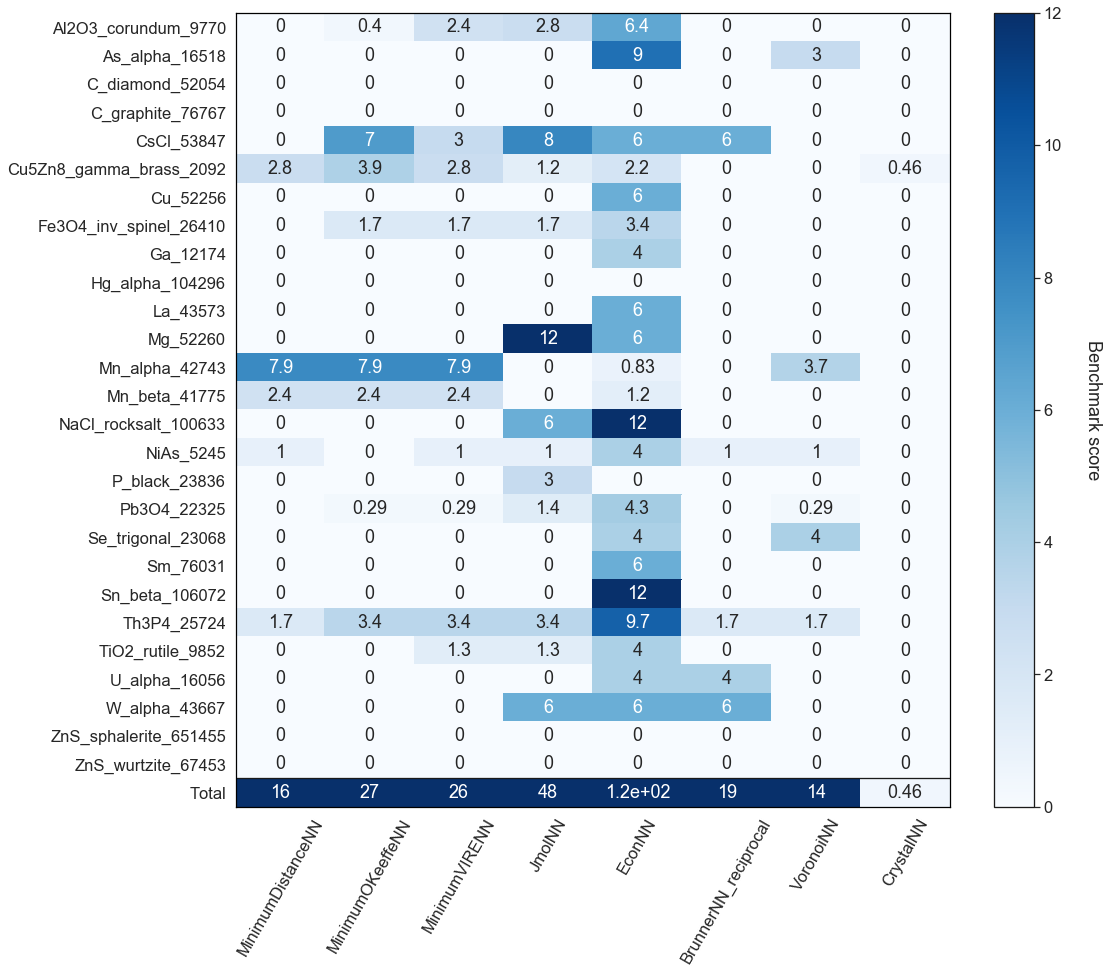

In [11]:
%matplotlib inline

from materialscoord.plot import plot_benchmark_scores

scores = bm.score(nn_methods)
plt = plot_benchmark_scores(scores)